<a href="https://colab.research.google.com/github/Saurav3799/Churn-Prediction-for-Telecom-Company./blob/main/telecompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # we begin with adding the usual imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# now we can read the dataset, We use the read_csv function to read the data

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Now, let’s look at the first couple of rows using df.head()  By default,it shows the first five rows of the dataframe


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# This dataframe has quite a few columns, so they all don’t fit on the screen. Instead, we can transpose the dataframe using the T function

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
# to check whether the actual types are correct. by using df.dtypes

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#  for cases when you expect a column to be numeric,but Pandas says it’s not
# We can force this column to be numeric by converting it to numbers using a special function in Pandas: to_numeric.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
# if columns contain null value or missing value then pandas show object for that reason we chek for null values using isnull().

df['TotalCharges'].isnull().sum()

11

In [ ]:
# Now it’s up to us to decide what to do with these missing values
# in that dataset totalcharges contains the total amount of money the client was charged.
# for that reason we fill null values using avg charges

df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [ ]:
# now we see there is no null values present in totalcharges

df['TotalCharges'].isnull().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


Text(0.5, 1.0, 'InternetService vs churn')

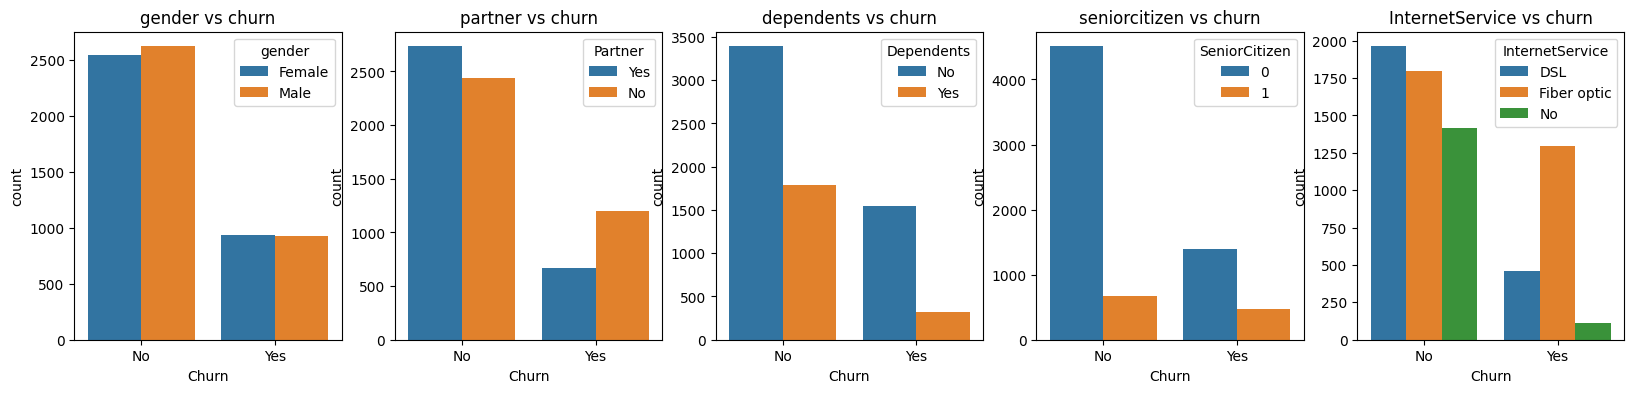

In [ ]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))
sns.countplot(x='Churn',data=df,hue='gender', ax=axes[0])
axes[0].set_title('gender vs churn')

sns.countplot(x='Churn',data=df,hue='Partner', ax=axes[1])
axes[1].set_title('partner vs churn')


sns.countplot(x='Churn',data=df,hue='Dependents', ax=axes[2])
axes[2].set_title('dependents vs churn')


sns.countplot(x='Churn',data=df,hue='SeniorCitizen', ax=axes[3])
axes[3].set_title('seniorcitizen vs churn')

sns.countplot(x='Churn',data=df,hue='InternetService', ax=axes[4])
axes[4].set_title('InternetService vs churn')

# The difference between the group rates for both females and males is quite small which doesn’t help us identify whether they will churn.
# People with a partner churn less than people with no partner.
# clients with no dependents are more likely tchurn than the dependent clients
# Senior citizens sre more likely churn than nonseniors.
# internet service fiber optics users more likely to churn than others

Text(0.5, 1.0, 'DeviceProtection vs churn')

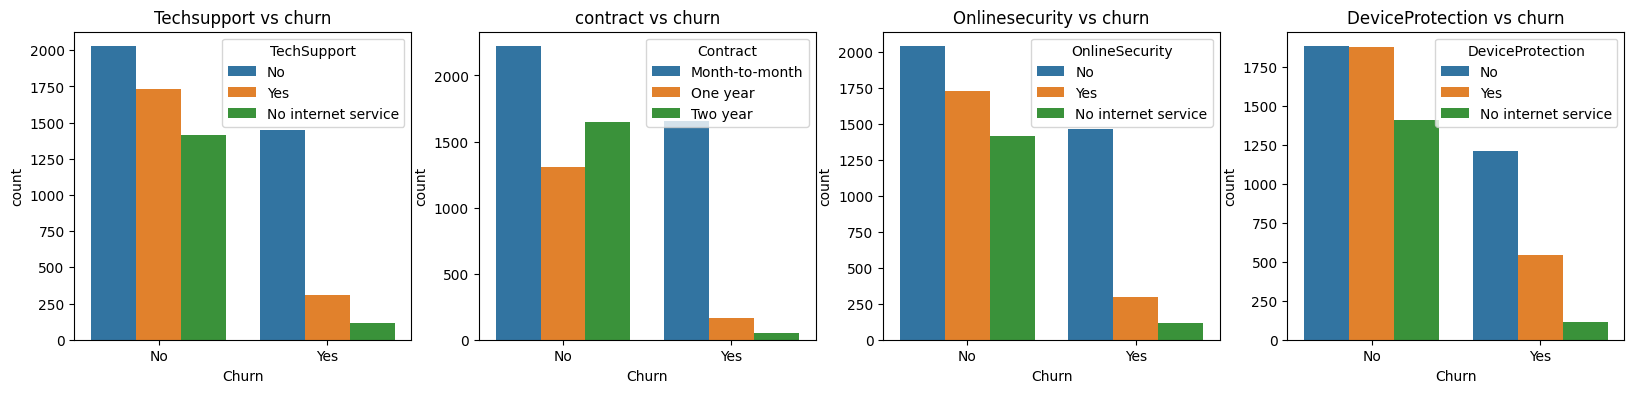

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.countplot(x='Churn',data=df,hue='TechSupport', ax=axes[0])
axes[0].set_title('Techsupport vs churn')

sns.countplot(x='Churn',data=df,hue='Contract', ax=axes[1])
axes[1].set_title('contract vs churn')


sns.countplot(x='Churn',data=df,hue='OnlineSecurity', ax=axes[2])
axes[2].set_title('Onlinesecurity vs churn')


sns.countplot(x='Churn',data=df,hue='DeviceProtection', ax=axes[3])
axes[3].set_title('DeviceProtection vs churn')


#  Clients with no tech support are churn more than those who do
#  Clients with month-to-month contract are more likely to churn
#  Clients with no onlinesecurityt are churn more than those who do
#  Clients with no Deviceprotection are churn more than those who do

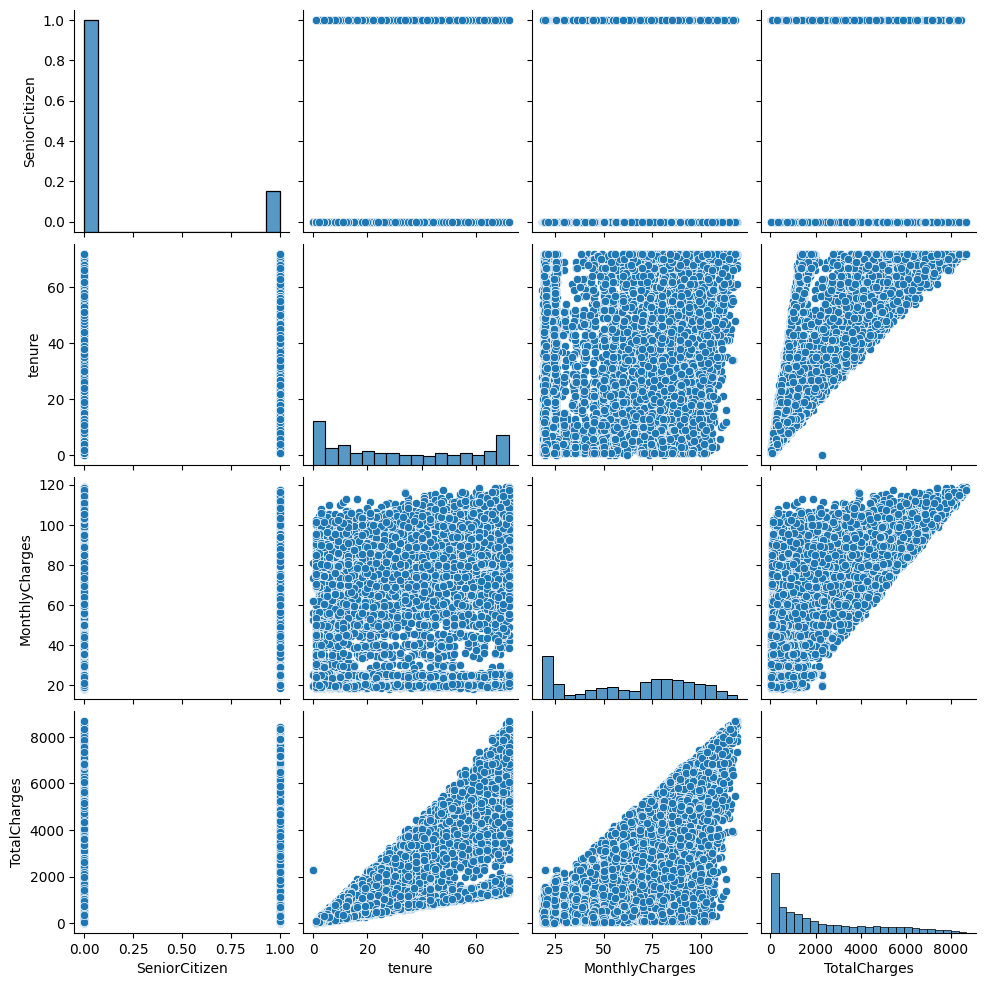

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

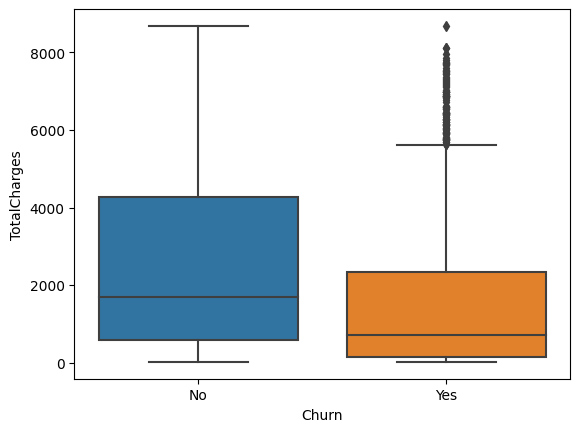

In [ ]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)


<Axes: xlabel='Churn', ylabel='tenure'>

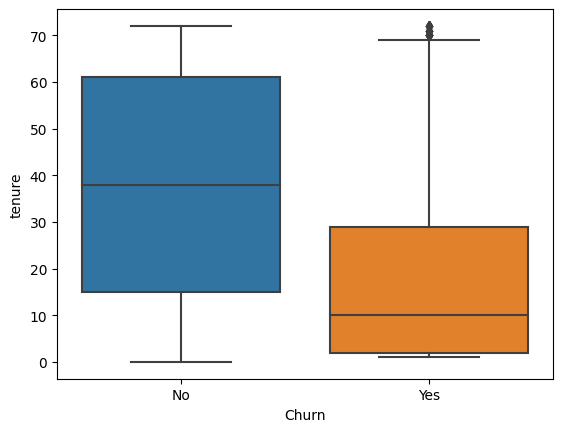

In [ ]:
sns.boxplot(x="Churn", y="tenure", data=df)

In [ ]:
# now look at our target variable: churn. Currently, it’s categorical thats why we use LABELENCODING.
# and LABELENCODING only apply on categoricals thats why we create categorical columns in 1 datframe

categorical = df[[var for var in df.columns if df[var].dtype=='O']]


from sklearn.preprocessing import LabelEncoder
lnc = LabelEncoder()
cat = categorical.apply (lnc.fit_transform)

cat


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1525,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,3367,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,5934,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [ ]:
num = df[[var for var in df.columns if df[var].dtype!='O']]
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [ ]:
df1=pd.concat([num,cat],axis=1)
dt = df1.drop(['customerID','MultipleLines','StreamingTV','StreamingMovies'],axis=1)
dt.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
SeniorCitizen,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,1.0,0.00
tenure,1.00,34.00,2.00,45.00,2.00,8.00,22.0,10.00,28.00,62.00,...,38.00,67.00,19.0,12.00,72.00,24.0,72.0,11.00,4.0,66.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70,99.65,89.1,29.75,104.80,56.15,...,69.50,102.95,78.7,60.65,21.15,84.8,103.2,29.60,74.4,105.65
TotalCharges,29.85,1889.50,108.15,1840.75,151.65,820.50,1949.4,301.90,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.30,1419.40,1990.5,7362.9,346.45,306.6,6844.50
gender,0.00,1.00,1.00,1.00,0.00,0.00,1.0,0.00,0.00,1.00,...,1.00,0.00,1.0,0.00,0.00,1.0,0.0,0.00,1.0,1.00
Partner,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,...,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.00,1.0,0.00
Dependents,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,1.00,...,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.00,0.0,0.00
PhoneService,0.00,1.00,1.00,0.00,1.00,1.00,1.0,0.00,1.00,1.00,...,1.00,1.00,1.0,0.00,1.00,1.0,1.0,0.00,1.0,1.00
InternetService,0.00,0.00,0.00,0.00,1.00,1.00,1.0,0.00,1.00,0.00,...,1.00,1.00,1.0,0.00,2.00,0.0,1.0,0.00,1.0,1.00
OnlineSecurity,0.00,2.00,2.00,2.00,0.00,0.00,0.0,2.00,0.00,2.00,...,0.00,2.00,0.0,0.00,1.00,2.0,0.0,2.00,0.0,2.00


In [ ]:
dt.isnull().sum()

SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
gender              0
Partner             0
Dependents          0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

<Axes: >

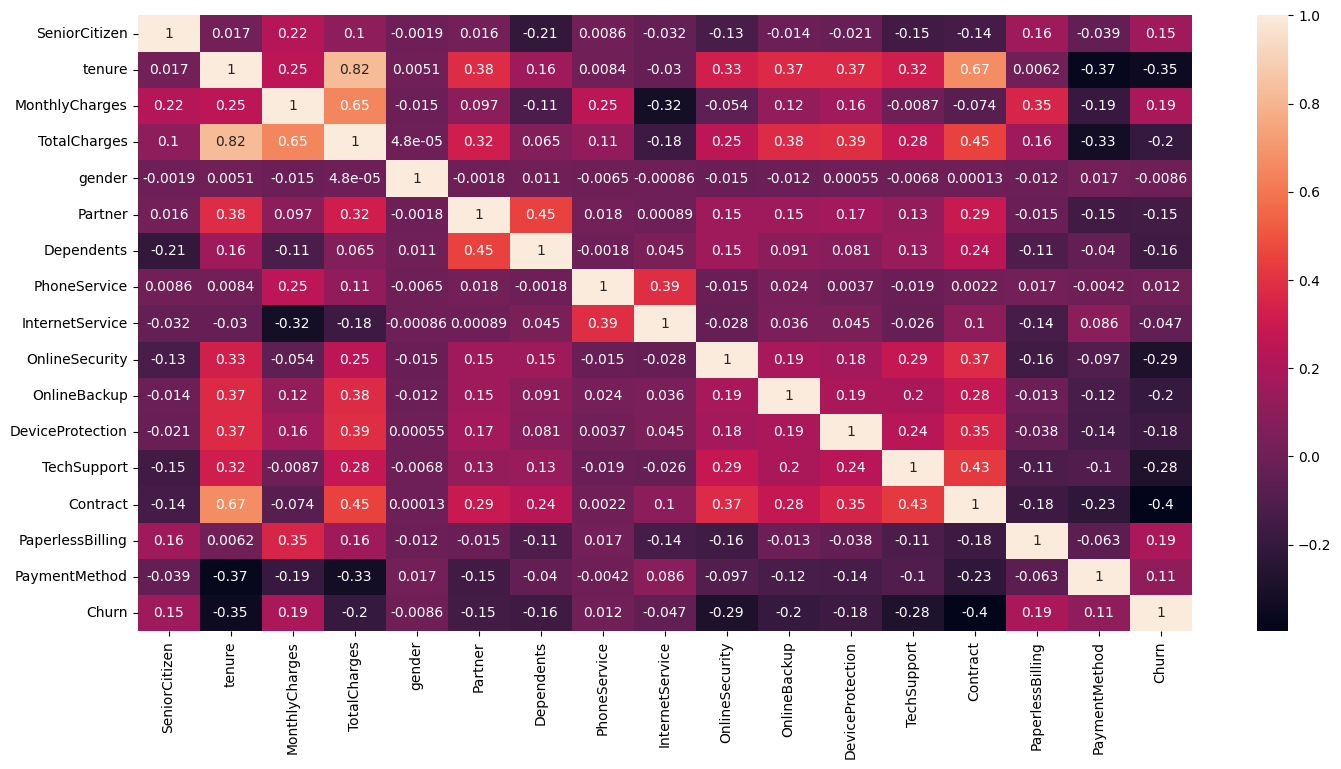

In [ ]:
plt.figure(figsize=(17,8))
corr=dt.corr()
sns.heatmap(corr,annot=True,cbar=True)

# from this heatmap we can easily identify which variables correlated with each others

In [ ]:
x = dt.drop(columns='Churn',axis=1)
y = dt['Churn']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best= SelectKBest(chi2,k=9)   # for selecting 9 best features we use SelectKbest
k_best.fit(x,y)
ix = k_best.get_support()
dt = pd.DataFrame(k_best.transform(x),columns=x.columns.values[ix])
dt

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract
0,0.0,1.0,29.85,29.85,0.0,2.0,0.0,0.0,0.0
1,0.0,34.0,56.95,1889.50,2.0,0.0,2.0,0.0,1.0
2,0.0,2.0,53.85,108.15,2.0,2.0,0.0,0.0,0.0
3,0.0,45.0,42.30,1840.75,2.0,0.0,2.0,2.0,1.0
4,0.0,2.0,70.70,151.65,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,2.0,0.0,2.0,2.0,1.0
7039,0.0,72.0,103.20,7362.90,0.0,2.0,2.0,0.0,1.0
7040,0.0,11.0,29.60,346.45,2.0,0.0,0.0,0.0,0.0
7041,1.0,4.0,74.40,306.60,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = dt

In [ ]:
# The function train_test_split takes a dataframe df and creates two new dataframes
#  that the test set contains 20% of the data and the train set contains the remaining 80%.
#  random_state. It’s needed for ensuring that everytime we run this code, the dataframe is split in the exact same way


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# check the distribution of values in the target variable.

y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [ ]:
# now we can see that our count of target variable is imbalanced.
# thats why we use undersampling and oversampling to balanced data.

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

In [ ]:
y_train_smt.value_counts()

0    3760
1    3760
Name: Churn, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_sc = mms.fit_transform(x_train_smt)
x_test_sc = mms.fit_transform(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train_smt,y_train_smt)

LogisticRegression()

In [ ]:
y_pred_lrc = lrc.predict(x_test)
print(classification_report(y_test,y_pred_lrc))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.81      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [ ]:
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

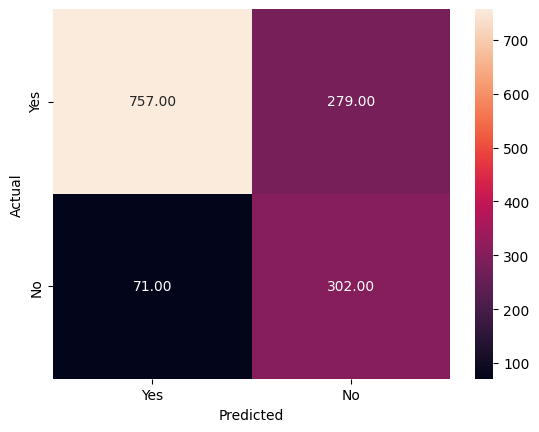

In [ ]:
draw_cm(y_test,y_pred_lrc)

In [ ]:
def ROC_Curve(Actual,Predicted):
  fpr,tpr,thresholds = roc_curve(Actual,Predicted)
  roc = plt.plot(fpr,tpr)
  plt.xlabel('False Possitive Rate')
  plt.ylabel('True Possitive Rate')
  plt.title('ROC Curve')
  plt.show()
  Threshold=thresholds
  return roc,thresholds

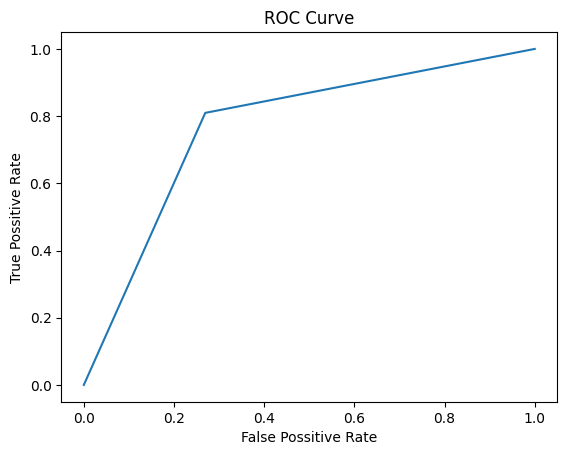

([<matplotlib.lines.Line2D at 0x7fee45415fc0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_lrc)

In [ ]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

result_tabulation = pd.DataFrame(columns = cols)

Logistic_reg = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_lrc),
                 'Precision Score': metrics.precision_score(y_test, y_pred_lrc),
                 'Recall Score': metrics.recall_score(y_test, y_pred_lrc),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_lrc),
                 'f1-score':metrics.f1_score(y_test, y_pred_lrc)})

result_tabulation = result_tabulation.append(Logistic_reg, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.770173,0.519793,0.809651,0.751597,0.633124


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train_smt,y_train_smt)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = DT.predict(x_test)
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1036
           1       0.52      0.57      0.55       373

    accuracy                           0.75      1409
   macro avg       0.68      0.69      0.69      1409
weighted avg       0.76      0.75      0.75      1409



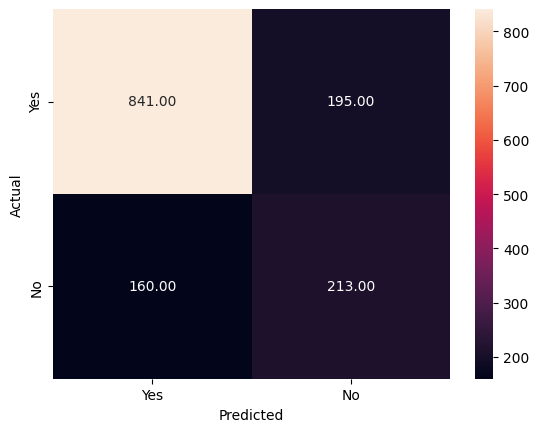

In [ ]:
 draw_cm(y_test,y_pred_DT)

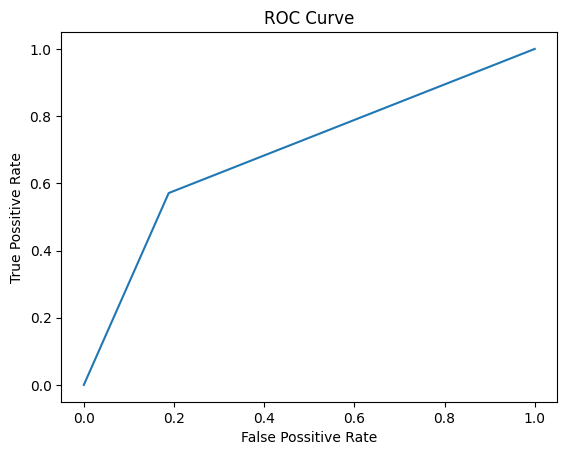

([<matplotlib.lines.Line2D at 0x7fee45212a70>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_DT)

In [ ]:
Decision_Tree = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT),
                 'f1-score':metrics.f1_score(y_test, y_pred_DT)})

result_tabulation = result_tabulation.append(Decision_Tree, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.770173,0.519793,0.809651,0.751597,0.633124
1,Decision Tree,0.691411,0.522059,0.571046,0.748048,0.545455


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_smt,y_train_smt)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



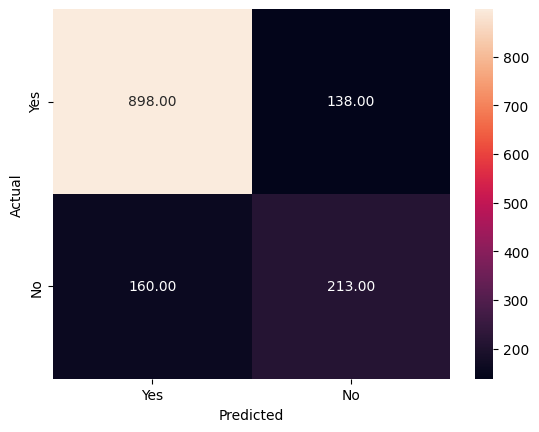

In [ ]:
 draw_cm(y_test,y_pred_rfc)

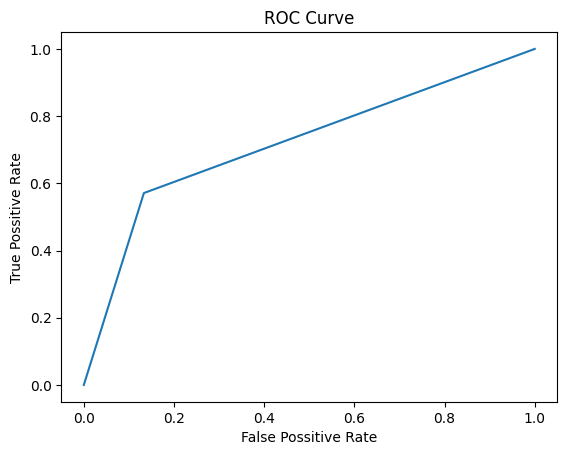

([<matplotlib.lines.Line2D at 0x7fee4517d7e0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_rfc)

In [ ]:
Random_Forest = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_rfc),
                 'Precision Score': metrics.precision_score(y_test, y_pred_rfc),
                 'Recall Score': metrics.recall_score(y_test, y_pred_rfc),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_rfc),
                 'f1-score':metrics.f1_score(y_test, y_pred_rfc)})

result_tabulation = result_tabulation.append(Random_Forest, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.770173,0.519793,0.809651,0.751597,0.633124
1,Decision Tree,0.691411,0.522059,0.571046,0.748048,0.545455
2,Random Forest,0.718920,0.606838,0.571046,0.788502,0.588398


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_smt,y_train_smt)

SVC()

In [ ]:
y_pred_svm = svm.predict(x_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1036
           1       0.45      0.64      0.53       373

    accuracy                           0.69      1409
   macro avg       0.65      0.68      0.65      1409
weighted avg       0.74      0.69      0.71      1409



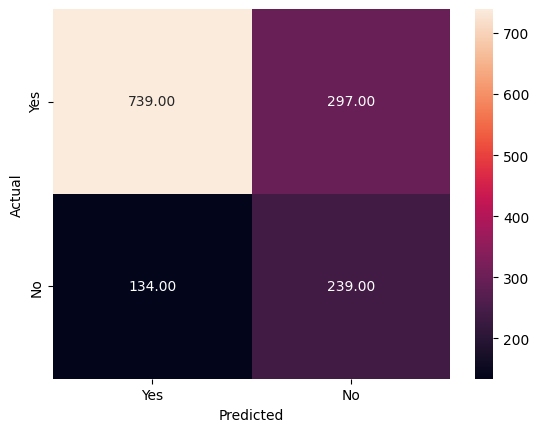

In [ ]:
 draw_cm(y_test,y_pred_svm)

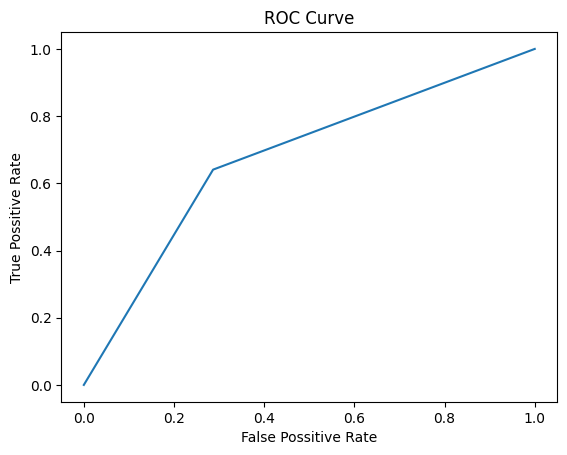

([<matplotlib.lines.Line2D at 0x7fee45049a20>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_svm)

In [ ]:
SVM = pd.Series({'Model': "SVM ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_svm),
                 'Precision Score': metrics.precision_score(y_test, y_pred_svm),
                 'Recall Score': metrics.recall_score(y_test, y_pred_svm),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_svm),
                 'f1-score':metrics.f1_score(y_test, y_pred_svm)})

result_tabulation = result_tabulation.append(SVM , ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.770173,0.519793,0.809651,0.751597,0.633124
1,Decision Tree,0.691411,0.522059,0.571046,0.748048,0.545455
2,Random Forest,0.718920,0.606838,0.571046,0.788502,0.588398
3,SVM,0.677036,0.445896,0.640751,0.694109,0.525853


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train_smt,y_train_smt)

GaussianNB()

In [ ]:
y_pred_NB = NB.predict(x_test)
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1036
           1       0.47      0.85      0.60       373

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.70      0.72      1409



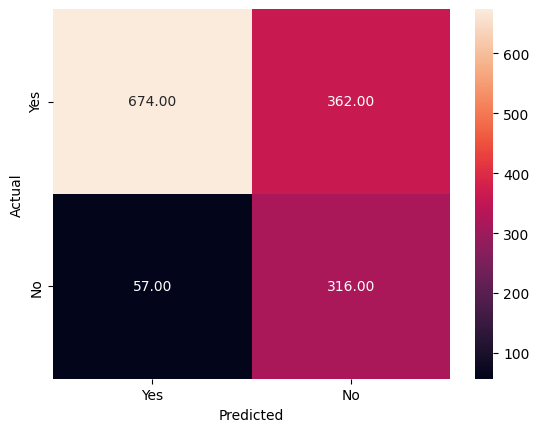

In [ ]:
 draw_cm(y_test,y_pred_NB)

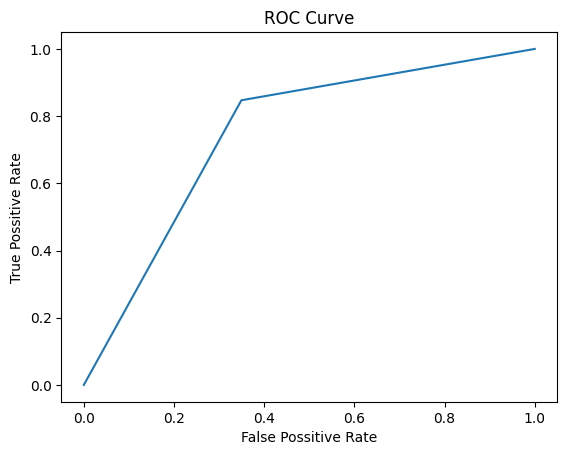

([<matplotlib.lines.Line2D at 0x7fee44e108e0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred_NB)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train_smt,y_train_smt)

GradientBoostingClassifier()

In [ ]:
y_pred_GB = GB.predict(x_test)
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.60      0.69      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



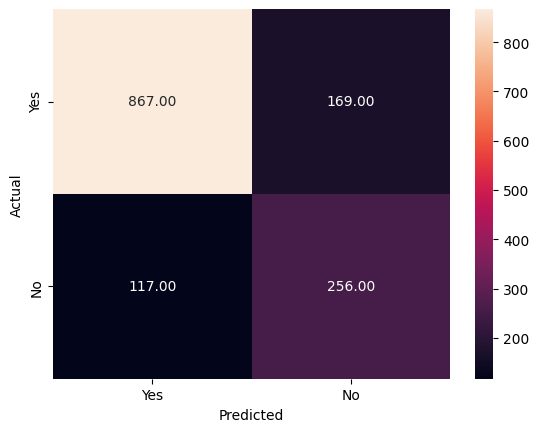

In [ ]:
 draw_cm_G(y_test,y_pred_GB)

In [ ]:
ROC_Curve(y_test,y_pred_GB)

In [ ]:
Grad_boosting= pd.Series({'Model': "Gradient Boosting ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_GB),
                 'Precision Score': metrics.precision_score(y_test, y_pred_GB),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GB),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GB),
                 'f1-score':metrics.f1_score(y_test, y_pred_GB)})

result_tabulation = result_tabulation.append(Grad_boosting , ignore_index = True)
result_tabulation

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"] }
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train_smt,y_train_smt)


In [ ]:
grid_search.best_score_

In [ ]:
dt_param = grid_search.best_params_
dt_param


In [ ]:
DT_gs = DecisionTreeClassifier(**dt_param)
DT_gs.fit(x_train_smt,y_train_smt)


In [ ]:
y_pred_dt_gs = DT_gs.predict(x_test)
print(classification_report(y_test,y_pred_dt_gs))

In [ ]:
draw_cm(y_test,y_pred_dt_gs)

In [ ]:
ROC_Curve(y_test,y_pred_dt_gs)

In [ ]:
Decision_Tree_Tunning = pd.Series({'Model': "Decision Tree Tunning",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_dt_gs),
                 'Precision Score': metrics.precision_score(y_test, y_pred_dt_gs),
                 'Recall Score': metrics.recall_score(y_test, y_pred_dt_gs),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_dt_gs),
                 'f1-score':metrics.f1_score(y_test, y_pred_dt_gs)})

result_tabulation = result_tabulation.append(Decision_Tree_Tunning, ignore_index = True)
result_tabulation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
random_search.fit(x_train_smt,y_train_smt)

In [ ]:
random_search.best_score_

In [ ]:
rf_param = random_search.best_params_
rf_param

In [ ]:
rf_rs = RandomForestClassifier(**rf_param)
rf_rs.fit(x_train_smt,y_train_smt)

In [ ]:
y_pred_rf_rs = rf_rs.predict(x_test)
print(classification_report(y_test,y_pred_rf_rs))

In [ ]:
draw_cm(y_test,y_pred_rf_rs)

In [ ]:
ROC_Curve(y_test,y_pred_rf_rs)

In [ ]:
Random_Forest_Tunning = pd.Series({'Model': "Random Forest Tunning",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_rf_rs),
                 'Precision Score': metrics.precision_score(y_test, y_pred_rf_rs),
                 'Recall Score': metrics.recall_score(y_test, y_pred_rf_rs),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_rf_rs),
                 'f1-score':metrics.f1_score(y_test, y_pred_rf_rs)})

result_tabulation = result_tabulation.append(Random_Forest_Tunning, ignore_index = True)
result_tabulation